# Excercise 2: Analysis of Predefined Time Series Data

### 1. Download the dataset https://www.kaggle.com/datasets/htagholdings/property-sales/code

In [115]:
df = pd.read_csv('/kaggle/input/property-sales/raw_sales.csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


### 2. Display the first few rows to peek at the data, the last few rows


In [116]:
df.head(), df.tail()

(              datesold  postcode   price propertyType  bedrooms
 0  2007-02-07 00:00:00      2607  525000        house         4
 1  2007-02-27 00:00:00      2906  290000        house         3
 2  2007-03-07 00:00:00      2905  328000        house         3
 3  2007-03-09 00:00:00      2905  380000        house         4
 4  2007-03-21 00:00:00      2906  310000        house         3,
                   datesold  postcode   price propertyType  bedrooms
 29575  2019-07-25 00:00:00      2900  500000         unit         3
 29576  2019-07-25 00:00:00      2612  560000         unit         2
 29577  2019-07-26 00:00:00      2912  464950         unit         2
 29578  2019-07-26 00:00:00      2601  589000         unit         2
 29579  2019-07-26 00:00:00      2612  775000         unit         2)

In [117]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


### 3. Print the summary statistics

In [118]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


### 4. Filter data for a specific year

In [119]:
df['datesold'] = pd.to_datetime(df['datesold'])

df.dtypes

datesold        datetime64[ns]
postcode                 int64
price                    int64
propertyType            object
bedrooms                 int64
dtype: object

In [120]:
df_2019 = df[df['datesold'].dt.year == 2019]
df_2019.head()

,datesold,postcode,price,propertyType,bedrooms
23530,2019-01-01,2904,591200,house,4
23531,2019-01-05,2913,550000,house,3
23532,2019-01-07,2914,468000,house,3
23533,2019-01-07,2913,980000,house,5
23534,2019-01-08,2615,460000,house,3


In [121]:
df.shape, df_2019.shape

((29580, 5), (1385, 5))

### 5. Plot the average price per year

In [122]:
df['count'] = 1 # this is for step 6
per_year = df
per_year.head()

,datesold,postcode,price,propertyType,bedrooms,count
0,2007-02-07,2607,525000,house,4,1
1,2007-02-27,2906,290000,house,3,1
2,2007-03-07,2905,328000,house,3,1
3,2007-03-09,2905,380000,house,4,1
4,2007-03-21,2906,310000,house,3,1


In [123]:
per_year.drop('propertyType', axis=1, inplace=True)
per_year.head()

,datesold,postcode,price,bedrooms,count
0,2007-02-07,2607,525000,4,1
1,2007-02-27,2906,290000,3,1
2,2007-03-07,2905,328000,3,1
3,2007-03-09,2905,380000,4,1
4,2007-03-21,2906,310000,3,1


In [124]:
per_year = per_year.groupby(per_year['datesold'].dt.year).mean()

In [125]:
per_year.head()

,datesold,postcode,price,bedrooms,count
datesold,,,,,
2007,2007-09-17 18:56:19.591836672,2737.292517,522377.210884,3.292517,1.0
2008,2008-09-17 06:43:22.816901376,2734.707355,493814.162754,3.333333,1.0
2009,2009-07-01 19:28:21.542777088,2745.084853,496092.032959,3.279102,1.0
2010,2010-07-18 15:52:54.019292672,2744.045659,559564.810289,3.325402,1.0
2011,2011-07-03 19:45:09.369259008,2738.410900,566715.110227,3.292713,1.0


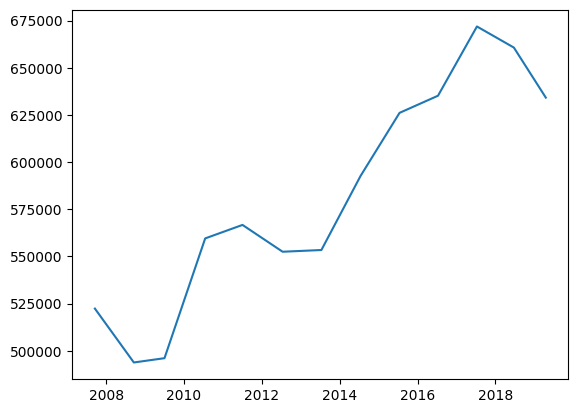

In [126]:
plt.plot( per_year['datesold'], per_year['price'])

### 6. Count of properties sold per year

Grouping by year and then finding the mean

In [135]:
per_year = df.groupby(df['datesold'].dt.year).size()
per_year

datesold
2007     147
2008     639
2009    1426
2010    1555
2011    1633
2012    1858
2013    2119
2014    2863
2015    3648
2016    3908
2017    4541
2018    3858
2019    1385
dtype: int64

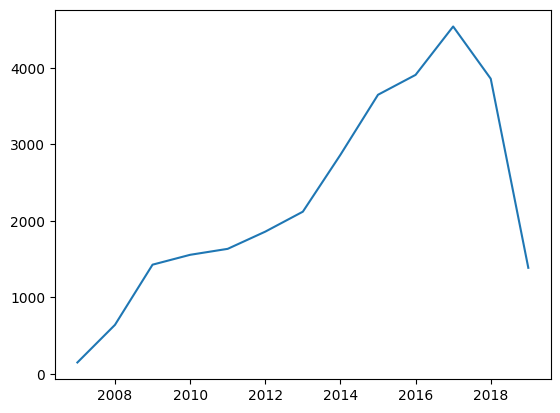

In [136]:
plt.plot(per_year)

### 7. Query for a specific date range (e.g., Jan 2010 to Dec 2015)

In [137]:
df.head()

,datesold,postcode,price,bedrooms,count
0,2007-02-07,2607,525000,4,1
1,2007-02-27,2906,290000,3,1
2,2007-03-07,2905,328000,3,1
3,2007-03-09,2905,380000,4,1
4,2007-03-21,2906,310000,3,1


Converting string to DateTime object, comparing with the pandas series to filter.

In [152]:
df[(df['datesold'] > pd.to_datetime('01-2015')) & \
(df['datesold'] < pd.to_datetime('05-2016'))]

,datesold,postcode,price,bedrooms,count
10730,2015-01-05,2902,375000,3,1
10731,2015-01-05,2913,645000,4,1
10732,2015-01-05,2600,800000,3,1
10733,2015-01-06,2904,580000,4,1
10734,2015-01-07,2611,445000,2,1
...,...,...,...,...,...
26843,2016-04-27,2602,222500,1,1
26844,2016-04-27,2604,420000,1,1
26845,2016-04-28,2617,278000,2,1
26846,2016-04-28,2617,295000,1,1


### 8. Calculate the mean price month-wise (use Groupby)

**Demonstrating `pd.dataframe.resample`**

In [169]:
#per_month = df['price'].groupby(by=[df['datesold'].dt.month, df['datesold'].dt.year]).mean()
per_month = df.resample(rule='M', on='datesold')['price'].mean()
per_month


datesold
2007-02-28    407500.000000
2007-03-31    339333.333333
2007-04-30    798000.000000
2007-05-31    339500.000000
2007-06-30    520333.333333
                  ...      
2019-03-31    651666.737288
2019-04-30    655325.561321
2019-05-31    641491.136364
2019-06-30    703275.396825
2019-07-31    583192.056000
Freq: M, Name: price, Length: 150, dtype: float64

Since pandas is built on top of Matplotlib as well, plotting can be done directly this way

<Axes: xlabel='datesold'>

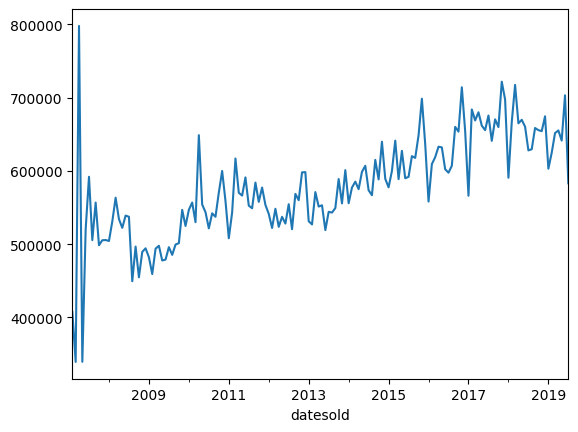

In [170]:
per_month.plot()

### 9. Perform a histogram plot

Text(0, 0.5, 'No. of houses/units of corresponding bedrooms')

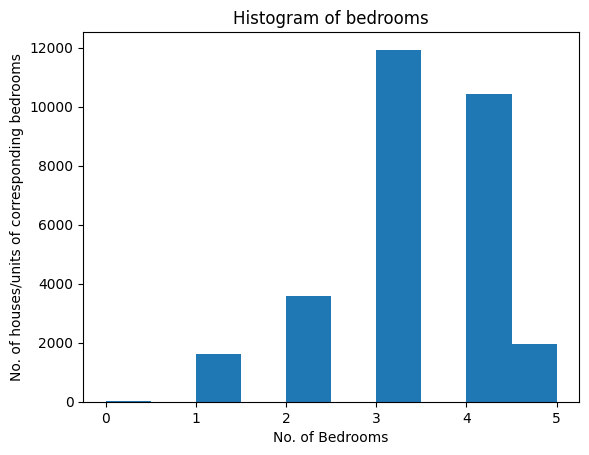

In [176]:
plt.hist(df['bedrooms'])
plt.title("Histogram of bedrooms")
plt.xlabel("No. of Bedrooms")
plt.ylabel("No. of houses/units of corresponding bedrooms")

### 10. Print the property price > 5Lakhs

Converting the `price` coolumn to an `int` datatype before filtering

In [184]:
df['price'] = df['price'].astype(int)

In [186]:
df[df['price'] > 50000]

,datesold,postcode,price,bedrooms,count
0,2007-02-07,2607,525000,4,1
1,2007-02-27,2906,290000,3,1
2,2007-03-07,2905,328000,3,1
3,2007-03-09,2905,380000,4,1
4,2007-03-21,2906,310000,3,1
...,...,...,...,...,...
29575,2019-07-25,2900,500000,3,1
29576,2019-07-25,2612,560000,2,1
29577,2019-07-26,2912,464950,2,1
29578,2019-07-26,2601,589000,2,1
